In [1]:
#These Installations are needed
!pip install scanpy[leiden]
!pip install pooch
!pip install scikit-image

#Tip: activate Auto-save to never lose data

In [2]:
# Import Core scverse libraries
import scanpy as sc
import anndata as ad

# Import Data retrieval package
import pooch

sc.settings.set_figure_params(dpi=50, facecolor="white")


In [3]:
#Download Dataset: Bone marrow mononuclear cells of healthy human donors [Luecken et al., 2021]
"""
Sidenote:
Single-cell RNA sequencing (scRNA-seq) starts by isolating individual cells from a sample, typically using techniques like microfluidics or droplet-based sorting. 
Each cell’s RNA is captured and converted into complementary DNA (cDNA), which is then amplified to ensure there’s enough material for sequencing. 
High-throughput sequencing is used to read the cDNA, producing data on the expression levels of thousands of genes per cell. 
Finally, computational analysis helps cluster cells by their gene expression profiles, identify cell types, and explore biological processes.
"""
EXAMPLE_DATA = pooch.create(
    path=pooch.os_cache("scverse_tutorials"),
    base_url="doi:10.6084/m9.figshare.22716739.v1/",
)
EXAMPLE_DATA.load_registry_from_doi()

#Converts Data into a AnnData object: data structure commonly used in single-cell analysis
samples = {
    "s1d1": "s1d1_filtered_feature_bc_matrix.h5",
    "s1d3": "s1d3_filtered_feature_bc_matrix.h5",
}
adatas = {}

for sample_id, filename in samples.items():
    path = EXAMPLE_DATA.fetch(filename)
    sample_adata = sc.read_10x_h5(path)
    sample_adata.var_names_make_unique()
    adatas[sample_id] = sample_adata

adata = ad.concat(adatas, label="sample")
adata.obs_names_make_unique()

c:\Users\lklei\anaconda3\envs\RNAseq\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\lklei\anaconda3\envs\RNAseq\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\lklei\anaconda3\envs\RNAseq\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\lklei\anaconda3\envs\RNAseq\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\lklei\anaconda3\envs\RNAseq\Lib\site-packages\anndata\_core\anndata.py:1756: UserWarning: Observation names are not

In [85]:
#Prints values: rows:individual cells, collumns:genes, values: number of times each gene's RNA was detected 
X_numpy = adata.X.toarray()
print(adata.X)

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 26539065 stored elements and shape (17041, 23427)>
  Coords	Values
  (0, 27)	1.1075376272201538
  (0, 43)	0.5161904096603394
  (0, 44)	0.5161904096603394
  (0, 46)	0.5161904096603394
  (0, 54)	0.5161904096603394
  (0, 55)	0.5161904096603394
  (0, 68)	0.5161904096603394
  (0, 83)	1.1075376272201538
  (0, 107)	0.5161904096603394
  (0, 118)	2.3474483489990234
  (0, 129)	0.5161904096603394
  (0, 132)	0.5161904096603394
  (0, 147)	1.1075376272201538
  (0, 155)	1.6201388835906982
  (0, 170)	0.5161904096603394
  (0, 171)	0.5161904096603394
  (0, 173)	0.5161904096603394
  (0, 221)	0.5161904096603394
  (0, 234)	0.5161904096603394
  (0, 239)	0.5161904096603394
  (0, 247)	0.5161904096603394
  (0, 248)	0.5161904096603394
  (0, 264)	0.5161904096603394
  (0, 280)	0.5161904096603394
  (0, 304)	0.5161904096603394
  :	:
  (17040, 23325)	0.5853821635246277
  (17040, 23326)	0.5853821635246277
  (17040, 23332)	0.5853821635246277
  (17040, 23333

In [5]:
#Prints metadata: names of 36601 genes detected
print(adata.var)

Empty DataFrame
Columns: []
Index: [MIR1302-2HG, FAM138A, OR4F5, AL627309.1, AL627309.3, AL627309.2, AL627309.5, AL627309.4, AP006222.2, AL732372.1, OR4F29, AC114498.1, OR4F16, AL669831.2, LINC01409, FAM87B, LINC01128, LINC00115, FAM41C, AL645608.6, AL645608.2, AL645608.4, LINC02593, SAMD11, NOC2L, KLHL17, PLEKHN1, PERM1, AL645608.7, HES4, ISG15, AL645608.1, AGRN, AL645608.5, AL645608.8, RNF223, C1orf159, AL390719.3, LINC01342, AL390719.2, TTLL10-AS1, TTLL10, TNFRSF18, TNFRSF4, SDF4, B3GALT6, C1QTNF12, AL162741.1, UBE2J2, LINC01786, SCNN1D, ACAP3, PUSL1, INTS11, AL139287.1, CPTP, TAS1R3, DVL1, MXRA8, AURKAIP1, CCNL2, MRPL20-AS1, MRPL20, AL391244.2, ANKRD65, AL391244.1, TMEM88B, LINC01770, VWA1, ATAD3C, ATAD3B, ATAD3A, TMEM240, SSU72, AL645728.1, FNDC10, AL691432.4, AL691432.2, MIB2, MMP23B, CDK11B, FO704657.1, SLC35E2B, CDK11A, SLC35E2A, NADK, GNB1, AL109917.1, CALML6, TMEM52, CFAP74, AL391845.2, GABRD, AL391845.1, PRKCZ, AL590822.2, PRKCZ-AS1, FAAP20, AL590822.1, SKI, ...]

[36601 row

In [6]:
#Prints metadata: barcode and batch of experiment(s1d1 or s1d3) of the 17125 cells looked at in the study: 8785 from s1d1 and 8340 from s1d3
"""
Barcoding: 
Each cell is given a unique identifier (a barcode) that is added to its RNA during the library preparation. 
This barcode allows you to trace back the gene expression profile to its originating cell after sequencing.
"""

print(adata.obs)
print(adata.obs["sample"].value_counts())

                   sample
AAACCCAAGGATGGCT-1   s1d1
AAACCCAAGGCCTAGA-1   s1d1
AAACCCAAGTGAGTGC-1   s1d1
AAACCCACAAGAGGCT-1   s1d1
AAACCCACATCGTGGC-1   s1d1
...                   ...
TTTGTTGAGAGTCTGG-1   s1d3
TTTGTTGCAGACAATA-1   s1d3
TTTGTTGCATGTTACG-1   s1d3
TTTGTTGGTAGTCACT-1   s1d3
TTTGTTGTCGCGCTGA-1   s1d3

[17125 rows x 1 columns]
sample
s1d1    8785
s1d3    8340
Name: count, dtype: int64


In [7]:
#Type of genes: mitochondiral(proteins for mitochondira), ribosom, hemoglobin
"""
Filtering:
By filtering or monitoring these gene categories, you can remove poor-quality or unwanted cells, 
ensuring that your downstream analysis focuses on healthy, high-quality cells.
"""
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

#This calculates quality control metrics
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

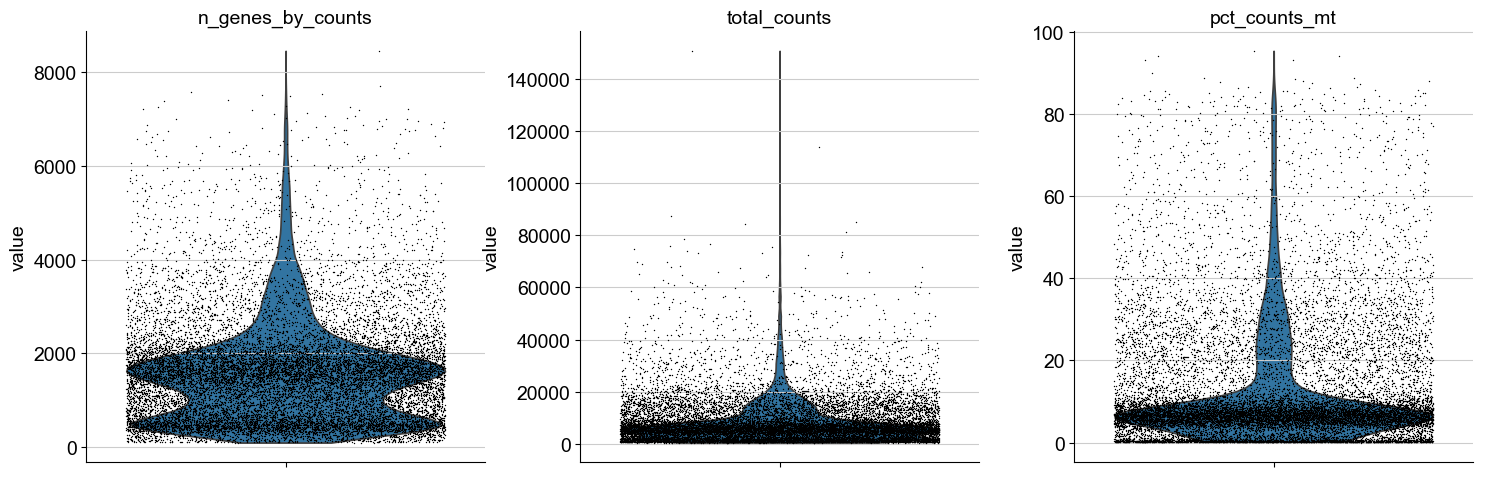

In [63]:
#this plots the quality control metrics
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
    save = True,
)
#n_genes_by_counts:  The number of genes detected (non-zero counts) in a given cell.
#total_counts: The total number of RNA molecules detected in a given cell. This is the sum of all gene expression values for that cell.
#pct_counts_mt: The percentage of total RNA counts in a cell that come from mitochondrial genes.

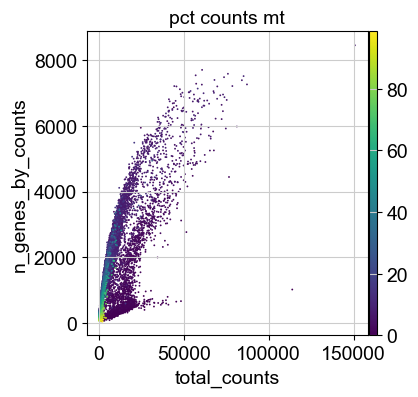

In [9]:
#This scatter plot plots the number of genes detected to total number of RNA molecules
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [10]:
#Filter out cells that have less then 100 genes expressed and Genes expressed in less than 3 cells.
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)

In [11]:
#Detect(and filters out?) douplets: When two or more cells are accidentally captured in the same droplet or well.
sc.pp.scrublet(adata, batch_key="sample")

In [12]:
"""
Normalizing of gene counts:
1.Count Depth Scaling: gene counts are adjusted according to the number of genes detected. Either to 10k or 1 million.
(Otherwise a cell with 100 genes detected would seem less "active" than another with 500)
2.Log1p Transformation: take the log of the value plus 1. (No issues with 0 value)
"""

# Saving count data
adata.layers["counts"] = adata.X.copy()

# Normalizing to median total counts
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

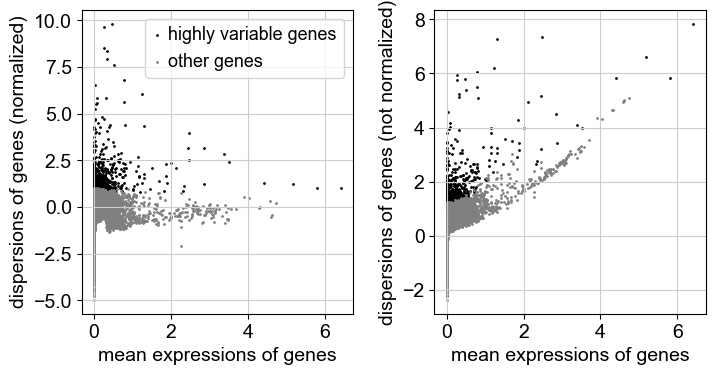

In [65]:
"""
Feature selection:
We only want to look and genes that are important to distinguish cells. Eg which are only expressed in some cells not all.
(=highly variable genes)
"""
#Find genes that are highly variable
sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key="sample")

#Plot highly variable genes
sc.pl.highly_variable_genes(adata, save = True)

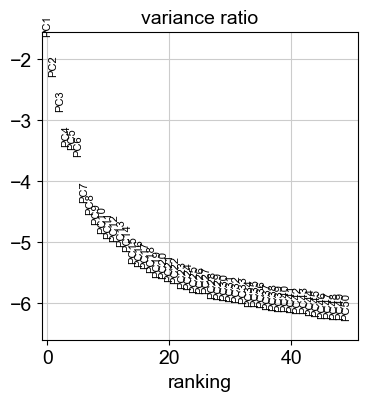

In [14]:
"""
Dimensionality Reduction:
Reduce the dimensionality of the data by running principal component analysis (PCA), which reveals the main axes of variation and denoises the data.
Principle Componenets: New Axes to capture the maximum amount of variance from the data
Variance Ratio: Proportion of the total variance in the data that is explained by each principal component.
"""
#Run PCA
sc.tl.pca(adata)
#Plot variance ratio(the more right a principle component is the less importent is it)
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)

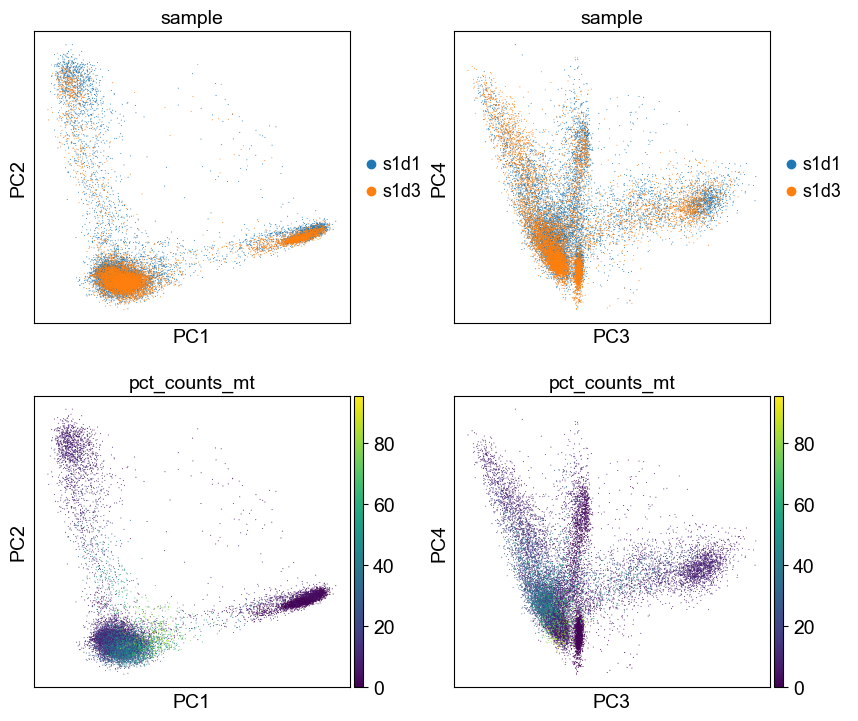

In [15]:
#plots the Principle Componenets 
sc.pl.pca(
    adata,
    color=["sample", "sample", "pct_counts_mt", "pct_counts_mt"],
    dimensions=[(0, 1), (2, 3), (0, 1), (2, 3)],
    ncols=2,
    size=2,
)
#Are undesired components driving the varience in hte dataset?(batch effects, QC metrics)#
#Looks good here. (Don#t know how exactly interpret these plots)

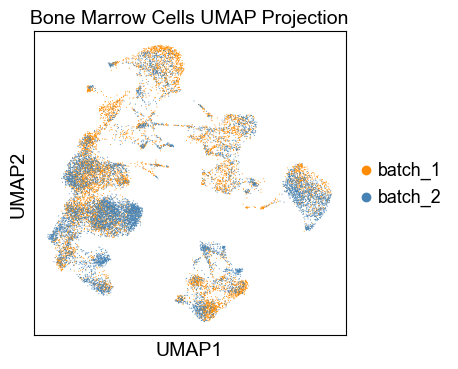

In [62]:
"""
Nearest neighbour graph:
A way of visualizing or organizing data points by finding their closest neighbors in their lower-dimensional space made by PCA
"""
colors = ["darkorange", "steelblue"]
#find neighbors
sc.pp.neighbors(adata)
#Plot 2D Graph
sc.tl.umap(adata)
sc.pl.umap(
    adata,
    color="sample",
    palette = colors,
    # Setting a smaller point size to get prevent overlap
    size=2,
    save = True,
    title = "Bone Marrow Cells UMAP Projection"
)

#This is a way to check for batch effects: data from both batches should overlap and not form their own patches

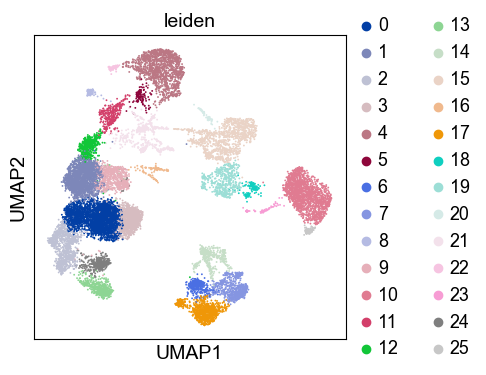

In [17]:
"""
Clustering: 
Data points in nearest neighbour graphs are clustered togther.
One cluster: One group of cells with similar expression profile
"""
#IMPORTANT: Don't run this code with exceptions activated, it will crash VS Code.(Unless you wait for a loong time)

#Disables exceptions
import sys
import os
sys.stderr = open(os.devnull, "w")

#Compute Clusters
sc.tl.leiden(adata, flavor="igraph", n_iterations=2)
#Plot 2D Graph
sc.pl.umap(adata, color=["leiden"])

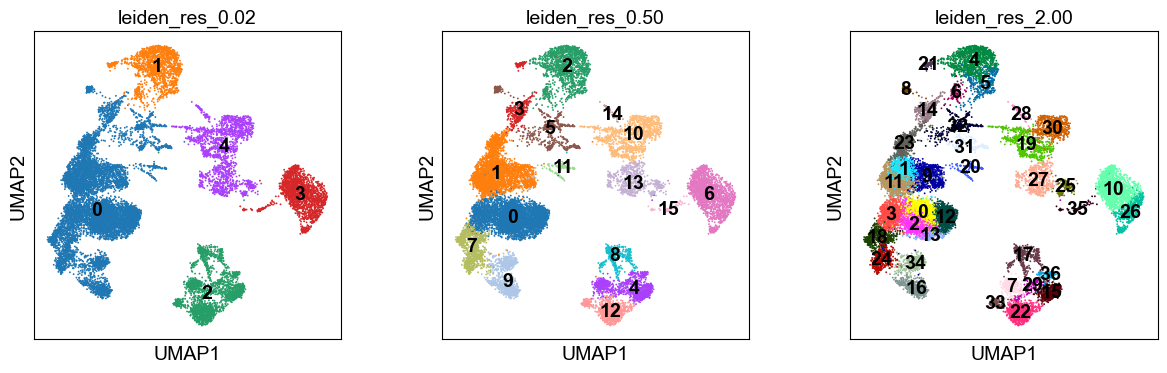

In [18]:
#Look at different Cluster "Resolution": Number of clusteres

#for loop with 3 different resolutions
for res in [0.02, 0.5, 2.0]:
    sc.tl.leiden(
        adata, key_added=f"leiden_res_{res:4.2f}", resolution=res, flavor="igraph"
    )
#plot
sc.pl.umap(
    adata,
    color=["leiden_res_0.02", "leiden_res_0.50", "leiden_res_2.00"],
    legend_loc="on data",
)

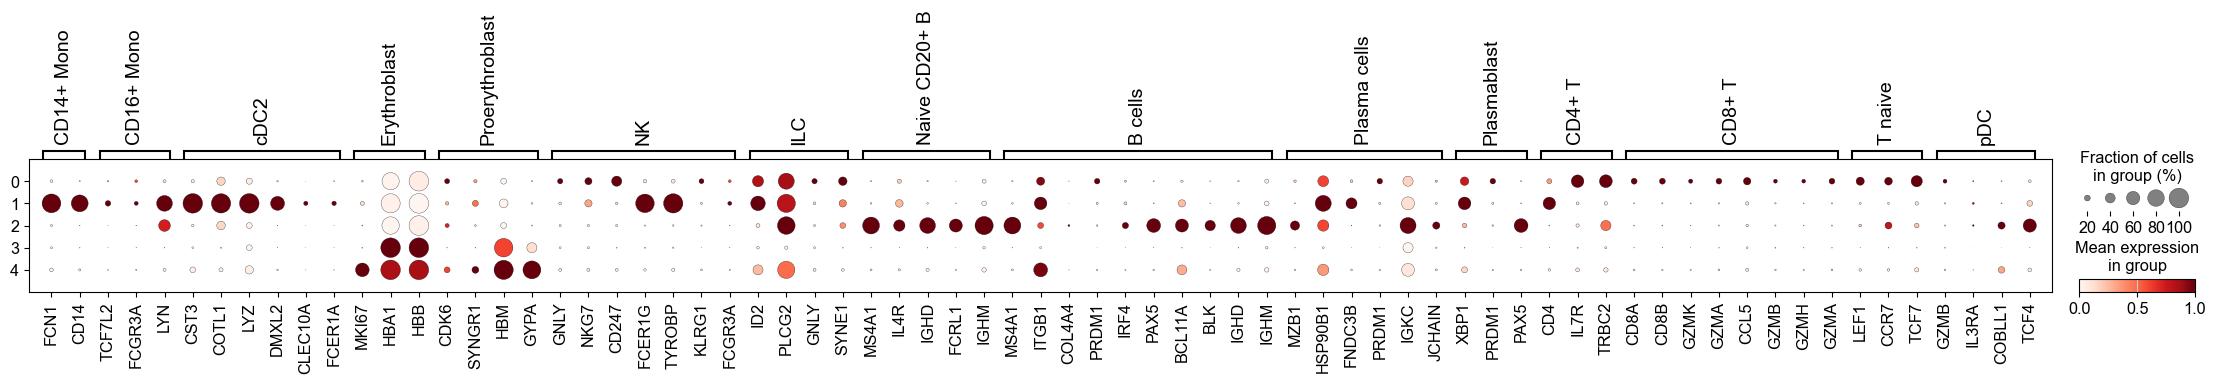

'\nDotplot:\nX-axis: Different marker genes for bone marrow cell types\nY-axis: 5 clusters of the 0.02 resolution\nDot sieze: Fraction of cells in that group\nDot color: Expression level\n'

In [19]:
"""
Marker Genes: 
Genes that are know to be specifically expressed in a specific cell type.
Here marker genes used to distinguish the main cell types of the bone marrow are listed in a dictionary
"""
#Define the marker genes
marker_genes = {
    "CD14+ Mono": ["FCN1", "CD14"],
    "CD16+ Mono": ["TCF7L2", "FCGR3A", "LYN"],
    # Note: DMXL2 should be negative
    "cDC2": ["CST3", "COTL1", "LYZ", "DMXL2", "CLEC10A", "FCER1A"],
    "Erythroblast": ["MKI67", "HBA1", "HBB"],
    # Note HBM and GYPA are negative markers
    "Proerythroblast": ["CDK6", "SYNGR1", "HBM", "GYPA"],
    "NK": ["GNLY", "NKG7", "CD247", "FCER1G", "TYROBP", "KLRG1", "FCGR3A"],
    "ILC": ["ID2", "PLCG2", "GNLY", "SYNE1"],
    "Naive CD20+ B": ["MS4A1", "IL4R", "IGHD", "FCRL1", "IGHM"],
    # Note IGHD and IGHM are negative markers
    "B cells": [
        "MS4A1",
        "ITGB1",
        "COL4A4",
        "PRDM1",
        "IRF4",
        "PAX5",
        "BCL11A",
        "BLK",
        "IGHD",
        "IGHM",
    ],
    "Plasma cells": ["MZB1", "HSP90B1", "FNDC3B", "PRDM1", "IGKC", "JCHAIN"],
    # Note PAX5 is a negative marker
    "Plasmablast": ["XBP1", "PRDM1", "PAX5"],
    "CD4+ T": ["CD4", "IL7R", "TRBC2"],
    "CD8+ T": ["CD8A", "CD8B", "GZMK", "GZMA", "CCL5", "GZMB", "GZMH", "GZMA"],
    "T naive": ["LEF1", "CCR7", "TCF7"],
    "pDC": ["GZMB", "IL3RA", "COBLL1", "TCF4"],
}

#Plot
sc.pl.dotplot(adata, marker_genes, groupby="leiden_res_0.02", standard_scale="var")

"""
Dotplot:
X-axis: Different marker genes for bone marrow cell types
Y-axis: 5 clusters of the 0.02 resolution
Dot sieze: Fraction of cells in that group
Dot color: Expression level
"""

In [20]:
"""
The Dotplot revealed these categories:
Cluster 0: Lymphocytes (adaptive immunity)
Cluster 1: Monocytes (innate immunity)
Cluster 2: Erythroid (Red Blood Cell Precursors)
Cluster 3: B Cells (Type of Lymphocyte)
"""
#Name the clusters
adata.obs["cell_type_lvl1"] = adata.obs["leiden_res_0.02"].map(
    {
        "0": "Lymphocytes",
        "1": "Monocytes",
        "2": "Erythroid",
        "3": "B Cells",
    }
)

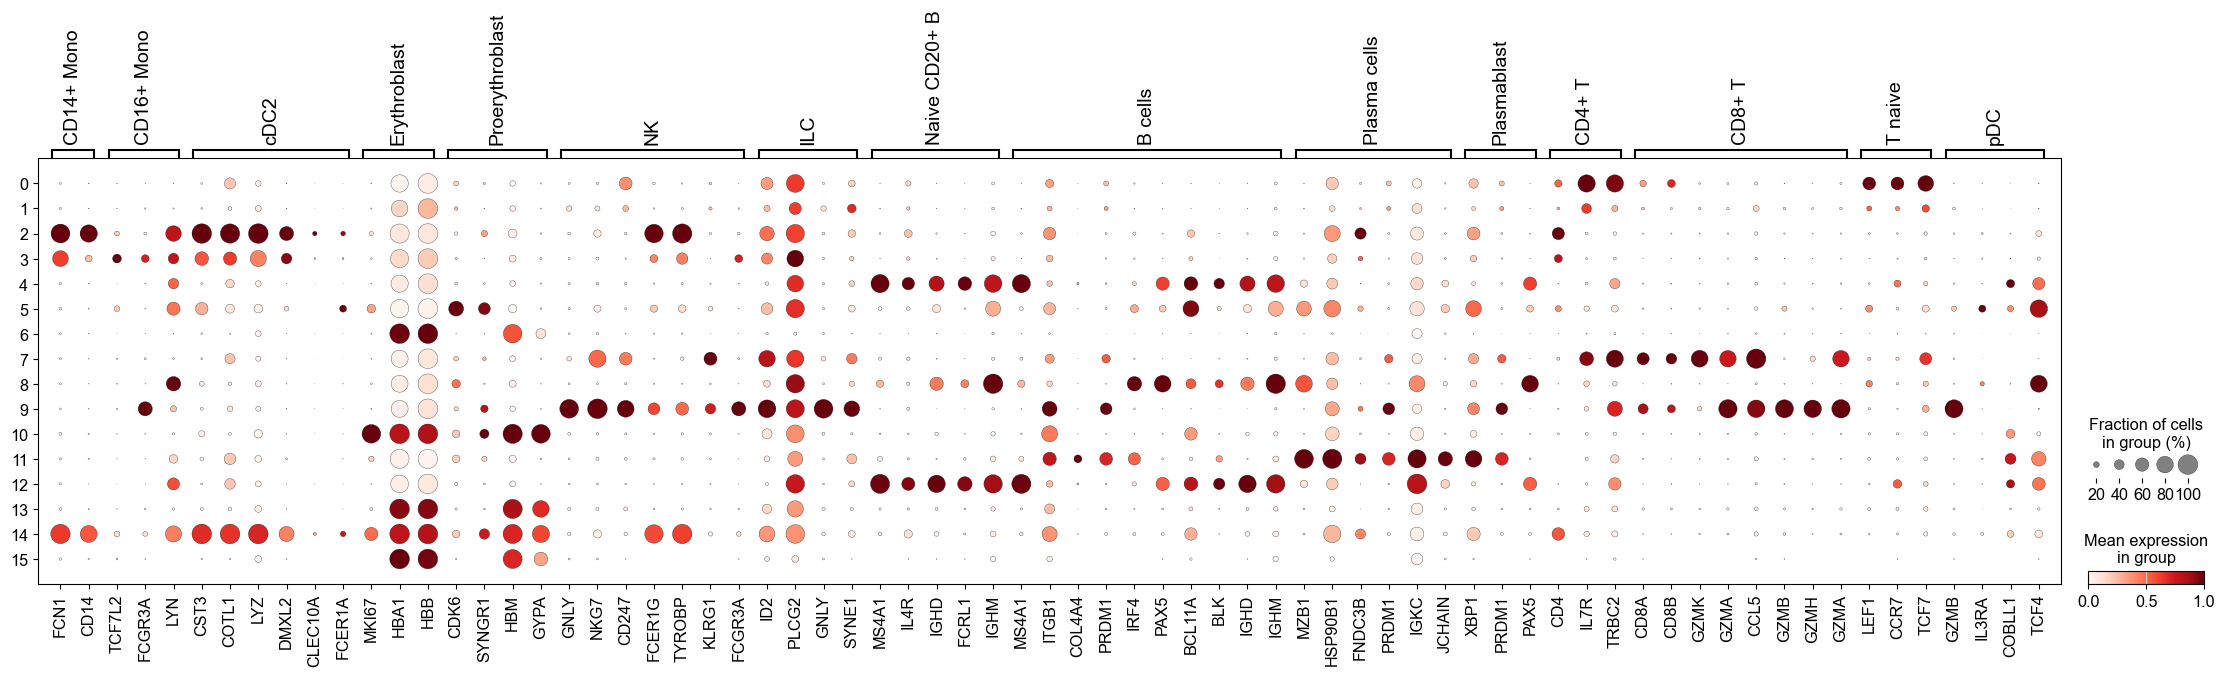

In [21]:
#Let's try with a higher resolution of clusters 
sc.pl.dotplot(adata, marker_genes, groupby="leiden_res_0.50", standard_scale="var")

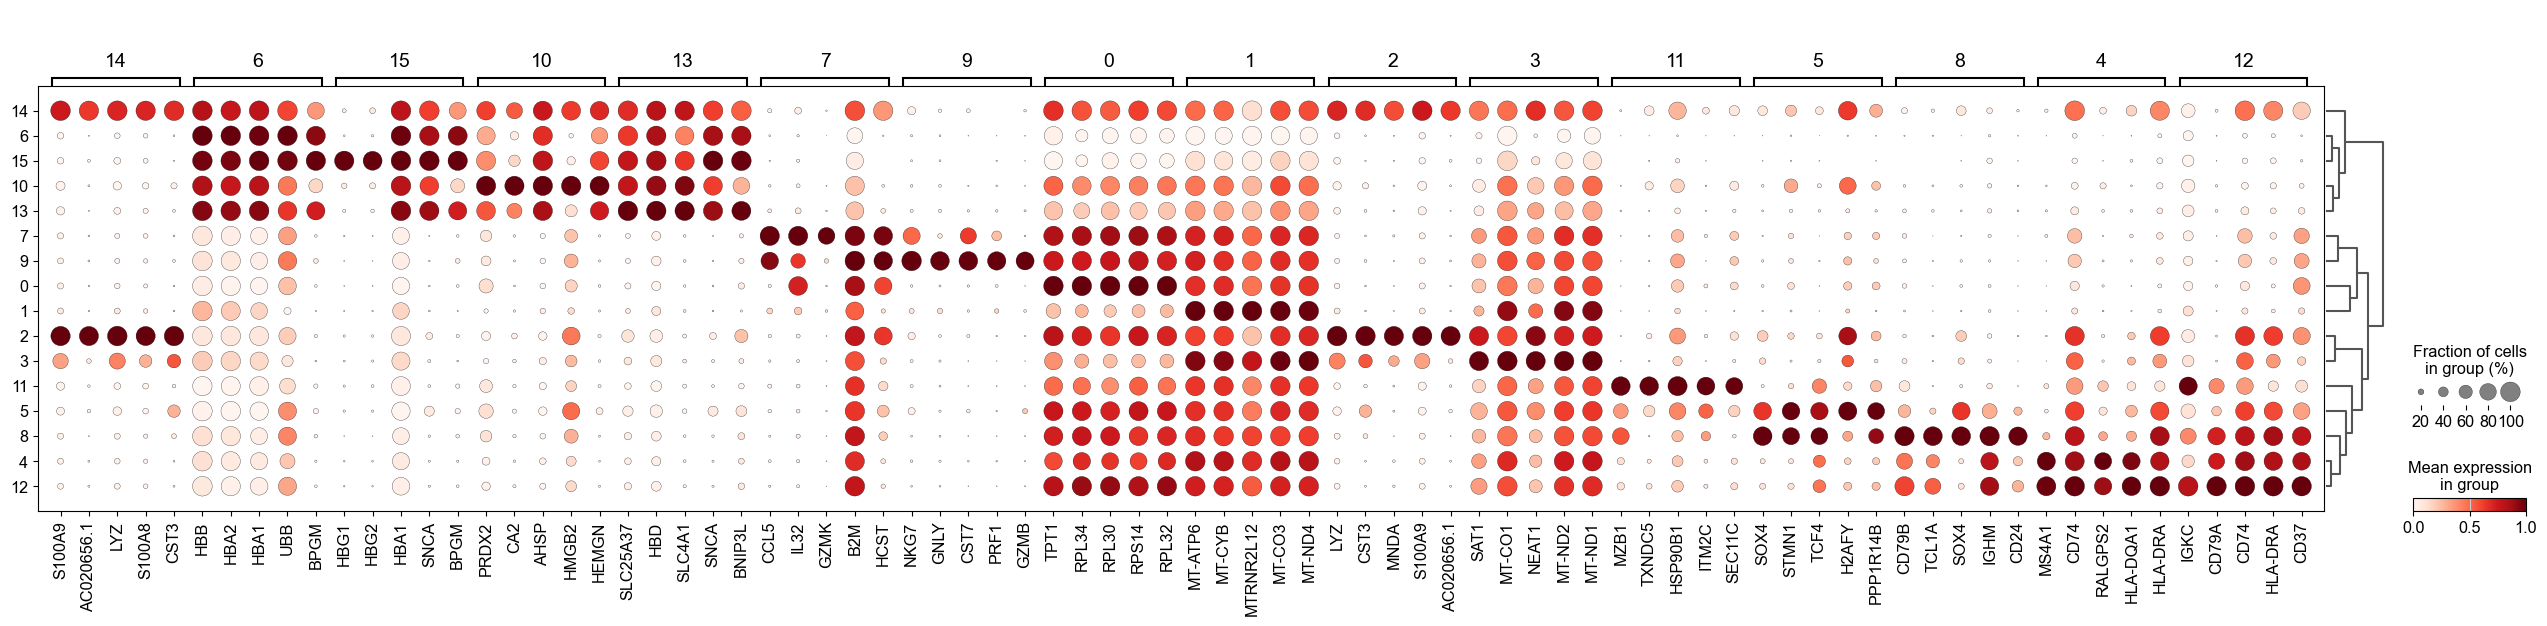

In [22]:
"""
Finding your own marker genes:
Marker genes per cluster: using Statistical tests (Wilcoxon and t-test) you can identify genes that are expressed at significantly higher levels in one cluster compared to others. 
These are referred to as marker genes for that cluster.
"""
# Obtain cluster-specific differentially expressed genes
sc.tl.rank_genes_groups(adata, groupby="leiden_res_0.50", method="wilcoxon")
#Plot
sc.pl.rank_genes_groups_dotplot(
    adata, groupby="leiden_res_0.50", standard_scale="var", n_genes=5
)

#X-Axis: marker genes identified for the 14 different clusters

In [23]:
# Top 5 Genes found to be marker genes for group 7
sc.get.rank_genes_groups_df(adata, group="7").head(5)["names"]
#These suggest that cluster 7 are NK cells.

0    CCL5
1    IL32
2    GZMK
3     B2M
4    HCST
Name: names, dtype: object

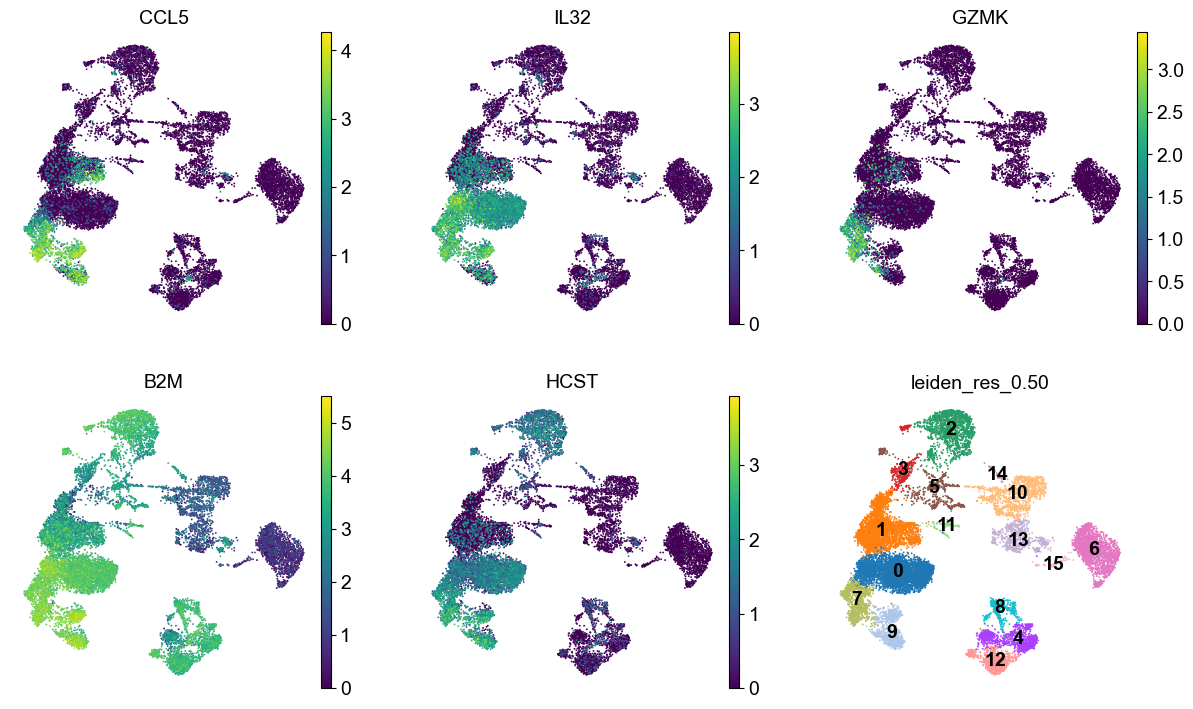

In [24]:
#5 Genes found to be marker genes for group 7
dc_cluster_genes = sc.get.rank_genes_groups_df(adata, group="7").head(5)["names"]
#Map the expression of these genes to the maps
sc.pl.umap(
    adata,
    color=[*dc_cluster_genes, "leiden_res_0.50"],
    legend_loc="on data",
    frameon=False,
    ncols=3,
)